# Ejercicio 1
Dada la función f(x,y) = x / (2x^2 + 3y^2 + 1)  

∂f/∂x = (-2x^2 + 3y^2 + 1) / (2x^2 + 3y^2 + 1)^2

∂f/∂y = (-6xy) / (2x^2 + 3y^2 + 1)^2

a) Indique el vector gradiente para 𝑥 = 1 e 𝑦 = −1  

b) Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una
dirección en la cual la función crezca, qué acción
tomaría?

i. Incrementar los valores de x e y

ii. Disminuir los valores de x e y

iii. Incrementar el valor de x y disminuir el de y

iv. Disminuir el valor de x e incrementar el de y

c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector
gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en
la nueva ubicación?

d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de
(𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?

e) Repita lo solicitado en c) para la dirección elegida en d) donde el objetivo fue hallar una ubicación
donde la función tome un valor menor.

f) Utilice la técnica del descenso de gradiente para calcular el valor y la ubicación del mínimo de la
función 𝑓(𝑥, 𝑦) que se observa en la figura.

g) Idem f) para el máximo de la función 𝑓(𝑥, 𝑦).


### a)

In [2]:
import sympy as sp

# Definir variables simbólicas
x, y = sp.symbols("x y")

# Definir la función
f = x / (2 * x**2 + 3 * y**2 + 1)

print(f)

x/(2*x**2 + 3*y**2 + 1)


In [3]:
# Derivadas parciales
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)

# Gradiente
grad_f = sp.Matrix([df_dx, df_dy])
print("Gradiente ∇f =", grad_f)

# Evaluar el gradiente en un punto específico (x=1, y=-1)
grad_at_point = grad_f.subs({x: 1, y: -1})
print("Gradiente en (1,-1) =", grad_at_point.evalf())

∂f/∂x = -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
∂f/∂y = -6*x*y/(2*x**2 + 3*y**2 + 1)**2
Gradiente ∇f = Matrix([[-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)], [-6*x*y/(2*x**2 + 3*y**2 + 1)**2]])
Gradiente en (1,-1) = Matrix([[0.0555555555555556], [0.166666666666667]])


### b) Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una dirección en la cual la función crezca, qué acción tomaría?

i. Incrementar los valores de x e y  --> Correcta, el gradiente aumenta en x e y

ii. Disminuir los valores de x e y

iii. Incrementar el valor de x y disminuir el de y

iv. Disminuir el valor de x e incrementar el de y

In [4]:
grad_at_point = grad_f.subs({x: 0.20, y: -1})
print("Gradiente en (0.20,-1) =", grad_at_point.evalf())

Gradiente en (0.20,-1) = Matrix([[0.235486351403306], [0.0720876585928489]])


### c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en la nueva ubicación?

Suponiendo un paso de esta forma:
(xnuevo, ynuevo) = (x0, y0) + alfa * ∇f(x0, y0) 

In [5]:
alpha = 0.1
x0, y0 = 0.20, -1
new_position = (x0 + alpha * grad_at_point[0], y0 + alpha * grad_at_point[1])
print("Nueva posición:", new_position)

Nueva posición: (0.223548635140331, -0.992791234140715)


### d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de (𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?

La idea seria disminuir en x e y.

### e)

In [6]:
alpha = 0.1
x0, y0 = 0.20, -1
new_position = (x0 + alpha * -grad_at_point[0], y0 + alpha * -grad_at_point[1])
print("Nueva posición:", new_position)

Nueva posición: (0.176451364859669, -1.00720876585928)


### f) Utilice la técnica del descenso de gradiente para calcular el valor y la ubicación del mínimo de la función 𝑓(𝑥, 𝑦) que se observa en la figura.

### g) Idem f) para el máximo de la función 𝑓(𝑥, 𝑦).

In [7]:
def gradient_descent(
    starting_point, learning_rate, num_iterations, error_threshold=1e-6
):
    point = sp.Matrix(starting_point)
    for _ in range(num_iterations):
        grad = grad_f.subs({x: point[0], y: point[1]}).evalf()
        point = point - learning_rate * grad
        if grad.norm() < error_threshold:
            break
    return point, f.subs({x: point[0], y: point[1]}).evalf()


# Parámetros
starting_point = (0.20, -1)
learning_rate = 0.1
num_iterations = 100
min_point, min_value = gradient_descent(starting_point, learning_rate, num_iterations)
print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)
max_point, max_value = gradient_descent(starting_point, -learning_rate, num_iterations)
print("Máximo en:", max_point)
print("Valor máximo:", max_value)

Mínimo en: Matrix([[-0.711096959054583], [-0.00193827784364301]])
Valor mínimo: -0.353545812006922
Máximo en: Matrix([[0.708187877814801], [-0.000273726833517454]])
Valor máximo: 0.353552938327043


# Ejercicio 2
El precio de una vivienda está dado por dos factores, la proximidad a centros comerciales, financieros, vías
y demás que se mide a través del factor j, y de la condición misma de la vivienda que se mide por el factor k.
La relación entre estos factores y el precio de la vivienda en un barrio determinado está dada por:

P(j,k) = k^2 - 2jk + 2j^2 + 18j - 20k + 201

donde el precio está dado en miles de dólares.
Utilice la técnica de descenso de gradiente para determinar los valores de j y k que minimizan el precio de
la vivienda.

In [8]:
import sympy as sp

j, k = sp.symbols("j k")
P = k**2 - 2 * j * k + 2 * j**2 + 18 * j - 20 * k + 201

P_grad = [sp.diff(P, j), sp.diff(P, k)]  # gradiente
print(P_grad)


def gradient_descent(
    starting_point, gradient, learning_rate, num_iterations, error_threshold=1e-6
):
    point = sp.Matrix(starting_point)
    for _ in range(num_iterations):
        grad = sp.Matrix(gradient).subs({j: point[0], k: point[1]}).evalf()
        # Restamos el gradiente para minimizar
        point = point - learning_rate * grad
        # Si la longitud del gradiente es menor que el umbral de error, detenemos
        if grad.norm() < error_threshold:
            break
    return point, P.subs({j: point[0], k: point[1]}).evalf()


min_point, min_value = gradient_descent((0, 0), P_grad, 0.1, 1000)

print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)

[4*j - 2*k + 18, -2*j + 2*k - 20]
Mínimo en: Matrix([[0.999999399436555], [10.9999990282679]])
Valor mínimo: 100.000000000000


# Ejercicio 3
A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores
para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales
y el tiempo promedio en minutos para completar el recorrido:

| Horas de Entrenamiento | Tiempo Promedio (min) |
|------------------------|----------------------|
| 2                      | 30.5                 |
| 3                      | 29.3                 |
| 4                      | 26.7                 |
| 4                      | 26.0                 |
| 5                      | 25.5                 |
| 6                      | 24.7                 |
| 6                      | 23.5                 |
| 7                      | 23.0                 |
| 7                      | 22.5                 |
| 8                      | 21.0                 |
| 10                     | 21.0                 |
| 10                     | 20.5                 |

A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta
de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija
a partir de las horas de entrenamiento semanales. Responder:

a) Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión
correspondiente. ¿La recta de regresión será de utilidad?

b) Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de
descenso de gradiente.

c) Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente
estocástico. ¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?

d) Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de
regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia
fija a partir de las horas de entrenamiento semanales.

e) Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia
fija un corredor que entrena 9 horas semanales.

### a)

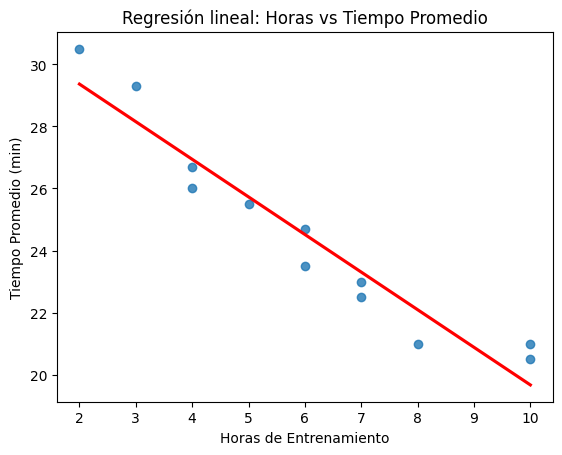

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Horas de Entrenamiento": [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    "Tiempo Promedio (min)": [
        30.5,
        29.3,
        26.7,
        26.0,
        25.5,
        24.7,
        23.5,
        23.0,
        22.5,
        21.0,
        21.0,
        20.5,
    ],
}

df = pd.DataFrame(data)

df["Horas de Entrenamiento"].corr(df["Tiempo Promedio (min)"])

sns.regplot(
    x="Horas de Entrenamiento",
    y="Tiempo Promedio (min)",
    data=df,
    ci=None,
    line_kws={"color": "red"},
)
plt.title("Regresión lineal: Horas vs Tiempo Promedio")
plt.show()

La recta sera de ayuda ya que al correlacion lineal es fuerte (negativa). Casi 1 es decir casi perfecta.

### b)

La formula de la ecuación de error cuadratico medio para regresión lineal simple es la siguiente:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$

Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que intenta predecir el modelo) del ejemplo $i$.
- $\hat{y}_i$ es el valor predicho por el modelo para el ejemplo $i$.


Muchas veces se encuentra así para derivar más facil:

$$
J(\beta_0, \beta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

donde :
$$
\hat{y}_i = \beta_0 + \beta_1 x_i
$$
Ya que las derivadas quedan así:

$$ 
\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)
$$
$$
\frac{\partial J}{\partial \beta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right) x_i
$$

### c)
En lugar de calcular el costo con todos los datos como en el MSE clásico, en SGD se toma un único ejemplo (o un mini-lote) en cada paso.

Ofrece:

1. Mayor velocidad en datasets grandes: no necesita calcular el costo y gradiente sobre todos los datos en cada iteración, solo sobre un ejemplo.

2. Puede escapar de mínimos locales gracias al ruido que introduce la actualización estocástica.

3. Actualizaciones más frecuentes → converge más rápido en la práctica (aunque con más oscilación).

4. Permite trabajar con datasets muy grandes o en streaming, donde no podés cargar todo en memoria.

#### d) 
Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de
regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia
fija a partir de las horas de entrenamiento semanales.

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Podemos estandarizar o no las variables pero para visualizarlo despues mejor no lo hacemos
# X = (
#     StandardScaler()
#     .fit_transform(df["Horas de Entrenamiento"].to_numpy(dtype=float).reshape(-1, 1))
#     .ravel()
# )
# y = (
#     StandardScaler()
#     .fit_transform(df["Tiempo Promedio (min)"].to_numpy(dtype=float).reshape(-1, 1))
#     .ravel()
# )
X = df["Horas de Entrenamiento"].to_numpy(dtype=float)
y = df["Tiempo Promedio (min)"].to_numpy(dtype=float)

learning = 0.0005
epochs = 5000
# b0 es la ordenada al origen y b1 la pendiente de la recta de regresion lineal simple
b0, b1 = 0.0, 0.0

rng = np.random.default_rng(42)

for epoch in range(epochs):
    # ACÁ SE DA LO DE LOS MINILOTES, TOMAMOS UNA PERMUTACION RANDOM DE LAS VARAIABLES PARA CALCULAR ERROR
    indicies = rng.permutation(len(X))
    for i in indicies:
        xi = X[i]
        yi = y[i]
        # Predicción de una variable actual
        y_pred = b0 + b1 * xi
        error = y_pred - yi
        # Actualizacion de ordenada al origen y pendiente
        b0 -= learning * error
        b1 -= learning * error * xi

# Punto de e)
X = 9
predict = b0 + b1 * X
print("Predicción para 9 horas de entrenamiento sin estandarizar:", predict)

Predicción para 9 horas de entrenamiento sin estandarizar: 21.025941162243306


# Ejercicio 4
El archivo ccpp.csv contiene 9568 datos de una central de ciclo combinado recolectados entre 2006 y 2011.
Usando la totalidad de los ejemplos se entrenaron 5 combinadores lineales con el objetivo de predecir el
valor del atributo PE correspondiente a la cantidad de energía producida a partir del atributo AT (más
detalles de este conjunto de datos aquí). Indique cuáles son los dos combinadores lineales con menor error
cuadrático promedio a la hora de predecir el valor de PE en función de AT:

a) W = -2.00 ; b= 500

b) W = -2.21 ; b= 498

c) W = -2.30 ; b= 497

d) W = -2.22 ; b=496.5

e) W = -2.16 ; b=496.91

![alt text](image-3.png)


In [11]:
import pandas as pd
import numpy as np
from ClassNeuronaLineal import NeuronaLineal

df = pd.read_csv("csv/CCPP.csv")
X = df[["AT"]].values  
y = df["PE"].values

parametros = [
    ("a", -2.00, 500),
    ("b", -2.21, 498),
    ("c", -2.30, 497),
    ("d", -2.22, 496.5),
    ("e", -2.16, 496.91),
]

resultados = []
for nombre, W, b in parametros:
    neurona = NeuronaLineal()
    neurona.w_ = np.array([W], dtype=float)
    neurona.b_ = float(b)
    y_pred = neurona.predict(X)
    mse = np.mean((y_pred - y) ** 2)
    resultados.append((nombre, W, b, mse))
    print(f"{nombre}) W={W}, b={b} -> MSE={mse:.4f}")

resultados.sort(key=lambda t: t[3])
print("\nLos dos combinadores con menor MSE son:")
for r in resultados[:2]:
    print(f"{r[0]}) W={r[1]}, b={r[2]} -> MSE={r[3]:.4f}")


a) W=-2.0, b=500 -> MSE=71.1626
b) W=-2.21, b=498 -> MSE=29.5571
c) W=-2.3, b=497 -> MSE=36.9194
d) W=-2.22, b=496.5 -> MSE=31.7856
e) W=-2.16, b=496.91 -> MSE=29.4485

Los dos combinadores con menor MSE son:
e) W=-2.16, b=496.91 -> MSE=29.4485
b) W=-2.21, b=498 -> MSE=29.5571


# Ejercicio 5
A partir de los ejemplos del archivo automobile-simple.csv, utilizado en la práctica anterior, se entrenará
un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor
(atributo “engine-size”):

a) Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo “price” utilizando
el valor promedio.

b) Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

i. Sin normalizar los atributos.

ii. Normalizando ambos atributos linealmente.

iii. Normalizando ambos atributos utilizando media y desvío.

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los
atributos? ¿Alguna de las normalizaciones es mejor? Explique.



In [27]:
df = pd.read_csv("csv/automobile-simple.csv")
df['price'].fillna(df['price'].mean(), inplace=True)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
def train_and_get_error(X, y, alpha=0.001, n_iter=2000):
    neurona = NeuronaLineal(alpha=alpha, n_iter=n_iter, draw=0)
    neurona.fit(X, y)
    y_pred = neurona.predict(X)
    mse = np.mean((y_pred - y) ** 2)
    return neurona, mse

# Sin normalizar
X = df[['engine-size']].to_numpy(dtype=np.float64)
y = df['price'].to_numpy(dtype=np.float64).reshape(-1, 1).ravel()
neurona, mse = train_and_get_error(X, y, alpha=1e-6, n_iter=2000)
print(f"Neurona entrenada: W={neurona.w_[0]}, b={neurona.b_} -> MSE={mse:.4f}")

scaler = StandardScaler()
X = scaler.fit_transform(df[['engine-size']].to_numpy(dtype=float))
y = scaler.fit_transform(df['price'].to_numpy(dtype=float).reshape(-1, 1)).ravel()
neurona, mse = train_and_get_error(X, y)
print(f"Neurona entrenada: W={neurona.w_[0]}, b={neurona.b_} -> MSE={mse:.4f}")

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['engine-size']].to_numpy(dtype=float))
y = scaler.fit_transform(df['price'].to_numpy(dtype=float).reshape(-1, 1)).ravel()
neurona, mse = train_and_get_error(X, y)
print(f"Neurona entrenada: W={neurona.w_[0]}, b={neurona.b_} -> MSE={mse:.4f}")


C:\Users\frank\AppData\Local\Temp\ipykernel_7900\155432527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


Neurona entrenada: W=106.70895737623778, b=-269.2076423527016 -> MSE=21299342.3977
Neurona entrenada: W=0.8587734114540405, b=-0.004416692239300282 -> MSE=0.2574
Neurona entrenada: W=1.066162732527736, b=-0.065368629923976 -> MSE=0.0098


Básicamente sin normalizar cae en un minimo local y tiene terrible error, además tengo que usar un alpha muy pequeño porque sino me revienta el codigo.
Normalizado funciona mejor.